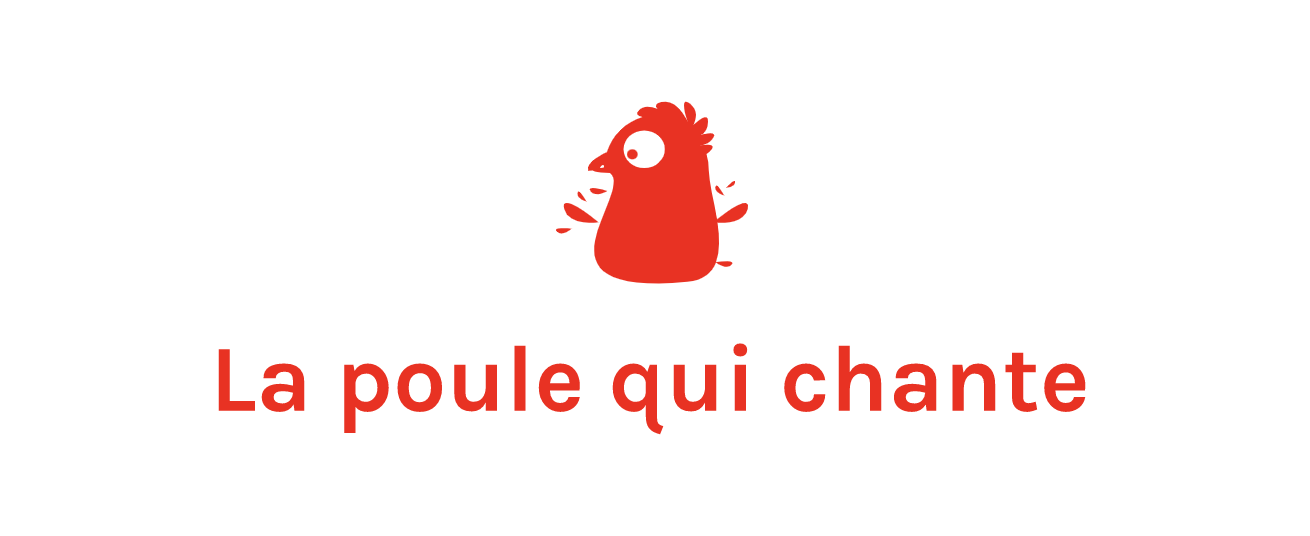

# <a id="Sommaire"><font size= "16" color = "#22AB5F" >Sommaire</font></a>

<font size= "2" color = "#5E420E" ><i> Pour naviguer, ces boutons sont cliquables :<i>▲ ▼</font>

<span style="color:#22AB5F">**Importations et fonctions** </span>[▼](#Chapitre0)
<br>
<blockquote>
    
**Librairies** [▼](#0A)
    
**Fonctions** [▼](#0B)
    
**Importation** [▼](#0C)
</blockquote>
<br>

<span style="color:#22AB5F">**Nettoyage des données** </span>[▼](#Chapitre1)
<br>
<blockquote>
    
**1 / Jointure** [▼](#1A)

**2 / Répartition des valeurs** [▼](#1B)

**3 / Table de travail** [▼](#1C)

</blockquote>

<br>

<span style="color:#22AB5F">**Mission** </span>[▼](#Chapitre2)
<br>
<blockquote>
    
**ACP** [▼](#2A)

**Clustering** [▼](#2B)

**Table des groupes et Heatmap** [▼](#2C)
</blockquote>


# <a id="Chapitre0"><font size= "16" color = "#22AB5F" >Importations et fonctions </font></a>[▲](#Sommaire)

## <a id="0A"><font size= "5" color = "#7D33AB" > 1 / Librairies </font></a>[▲](#Sommaire)

In [1]:
#Librairies usuelles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Librairies pour clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

## <a id="0B"><font size= "5" color = "#7D33AB" > 2 / Fonctions </font></a>[▲](#Sommaire)

In [3]:
# Boîte à moustache
def Boite(Serie):
    sns.boxplot(x=Serie)
    sns.set_theme(style="darkgrid")
    Title = "Repartition de la série "+Serie.name
    plt.title(Title)
    plt.show()

In [4]:
#Normalisation
def normalized(df):
    return (df-df.mean())/df.std()

In [5]:
# Fonction renvoyant les coefficient silhouette et une courbe les représentants
# Le nombre de cluster regardé est à changer en fonction du nombre de colonnes utilisées
def Silhouette(df):
    XSilh = df
    XSilh.fillna(method ='ffill', inplace = True)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(XSilh)
    X_normalized = normalize(X_scaled)
    X_principal = pd.DataFrame(X_normalized)
    ac2 = cluster.KMeans(n_clusters = 2)
    ac3 = cluster.KMeans(n_clusters = 3)
    ac4 = cluster.KMeans(n_clusters = 4)
    ac5 = cluster.KMeans(n_clusters = 5)
    ac6 = cluster.KMeans(n_clusters = 6)
    ac7 = cluster.KMeans(n_clusters = 7)
    ac8 = cluster.KMeans(n_clusters = 8)
    k = [2, 3, 4, 5, 6, 7, 8]
    silhouette_scores = []
    silhouette_scores.append(
            silhouette_score(X_principal, ac2.fit_predict(X_principal)))
    silhouette_scores.append(
            silhouette_score(X_principal, ac3.fit_predict(X_principal)))
    silhouette_scores.append(
            silhouette_score(X_principal, ac4.fit_predict(X_principal)))
    silhouette_scores.append(
            silhouette_score(X_principal, ac5.fit_predict(X_principal)))
    silhouette_scores.append(
            silhouette_score(X_principal, ac6.fit_predict(X_principal)))
    silhouette_scores.append(
            silhouette_score(X_principal, ac7.fit_predict(X_principal)))
    silhouette_scores.append(
            silhouette_score(X_principal, ac8.fit_predict(X_principal)))
    plt.plot(k, silhouette_scores)
    plt.xlabel('Nombre de clusters', fontsize = 20)
    plt.ylabel('Score Silhouette', fontsize = 20)
    plt.show()

In [6]:
# permettra de créer la dataFrame qui continendra les outliers
def OutliersFill(df,dfFiltre):
    Out = pd.DataFrame({'Zone': []})
    Difference = set(df["Zone"]).symmetric_difference(dfFiltre["Zone"])
    for i in Difference :
        Out = Out.append(pd.DataFrame({'Zone': [i]} ))
    return Out

## <a id="0C"><font size= "5" color = "#7D33AB" > 3 / Importations </font></a>[▲](#Sommaire)

In [7]:
# Revenu national brut pour 2017 (les zones ont été modifiées pour permettre la jointure)
Revenu = pd.read_excel (r'C:\Users\lucbo\OneDrive\Bureau\P9\DAN-P9-data\Revenu2.xlsx')

# Stabilite politique 2000-2018
PoliticalStability = pd.read_csv (r'C:\Users\lucbo\OneDrive\Bureau\P9\DAN-P9-data\PoliticalStability.csv', sep=",")

# Traduction des pays d'anglais à français
Traduction = pd.read_excel (r'C:\Users\lucbo\OneDrive\Bureau\P9\DAN-P9-data\TraductionNet.xlsx')

# Population 2000-2018
Population = pd.read_csv(r'C:\Users\lucbo\OneDrive\Bureau\P9\DAN-P9-data\Population_2000_2018.csv', sep=",")

# Disponibilite pour 2017
Disponibilite = pd.read_csv (r'C:\Users\lucbo\OneDrive\Bureau\P9\DAN-P9-data\DisponibiliteAlimentaire_2017.csv', sep=",")

In [8]:
Revenu.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Indicateurs macro,Afghanistan,Valeur US $ par habitant,Revenu national brut,2017,US$,519.395889
1,Indicateurs macro,Afrique du Sud,Valeur US $ par habitant,Revenu national brut,2017,US$,5938.277421
2,Indicateurs macro,Albanie,Valeur US $ par habitant,Revenu national brut,2017,US$,4525.226241
3,Indicateurs macro,Algérie,Valeur US $ par habitant,Revenu national brut,2017,US$,4056.010375
4,Indicateurs macro,Allemagne,Valeur US $ par habitant,Revenu national brut,2017,US$,45609.056208


In [ ]:
Revenu["Produit"].unique()

In [9]:
PoliticalStability.head()

,Country,Year,Political_Stability,Granularity
0,Afghanistan,2000,-2.44,Total
1,Afghanistan,2002,-2.04,Total
2,Afghanistan,2003,-2.20,Total
3,Afghanistan,2004,-2.30,Total
4,Afghanistan,2005,-2.07,Total


In [10]:
Traduction.head()

,Unnamed: 0,Country,Zone
0,0,Afghanistan,Afghanistan
1,167,South Africa,Afrique du Sud
2,1,Albania,Albanie
3,2,Algeria,Algérie
4,71,Germany,Allemagne


In [11]:
Population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [12]:
Disponibilite.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


# <a id="Chapitre1"><font size= "16" color = "#22AB5F" >Nettoyage des données </font></a>[▲](#Sommaire)

    -Filtre des tables à 2017
    -Suppression des lignes avec trop peu de données
    -Ecart des outliers

## <a id="1A"><font size= "5" color = "#7D33AB" > 1 / Jointure </font></a>[▲](#Sommaire)

In [13]:
# Valeurs de Revenu
print(Revenu.columns[0]," : ",Revenu[Revenu.columns[0]].unique(),"; ",
      Revenu.columns[2]," : ",Revenu[Revenu.columns[2]].unique(),"; ",
      Revenu.columns[3]," : ",Revenu[Revenu.columns[3]].unique(),"; ",
      Revenu.columns[4]," : ",Revenu[Revenu.columns[4]].unique(),"; ",
      Revenu.columns[5]," : ",Revenu[Revenu.columns[5]].unique())

Domaine  :  ['Indicateurs macro'] ;  Élément  :  ['Valeur US $ par habitant'] ;  Produit  :  ['Revenu national brut'] ;  Année  :  [2017] ;  Unité  :  ['US$']


In [14]:
RevT = Revenu.drop([Revenu.columns[0],
                   Revenu.columns[2],
                   Revenu.columns[3],
                   Revenu.columns[4],
                   Revenu.columns[5]],axis=1)
RevT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    211 non-null    object 
 1   Valeur  211 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [15]:
# Merge de la table politique avec sa traduction car Country est
# en anglais. La table traduction est faite pour correspondre avec
# les autres tables.
# Filtre pour 2017 sur cette jointure.
Politique = PoliticalStability.merge(Traduction)[["Zone","Year","Political_Stability"]]
Pol = Politique.loc[Politique["Year"]==2017][["Zone","Political_Stability"]]
Pol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 16 to 3524
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Zone                 198 non-null    object 
 1   Political_Stability  198 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


In [16]:
# Filtre sur Population, le code zone est conservé pour permettre une 
# jointure avec la disponibilité
PopFiltre = Population[["Code zone","Zone","Année","Valeur"]]
Pop = PopFiltre.loc[PopFiltre["Année"]==2017][["Code zone","Zone","Valeur"]]
Pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 17 to 4409
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Code zone  236 non-null    int64  
 1   Zone       236 non-null    object 
 2   Valeur     236 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.4+ KB


In [17]:
#Disponibilite ne contient que l'année 2017.
Disponibilite["Année"].unique()

array([2017], dtype=int64)

In [18]:
# Pivot de la table Disponibilitée
# Seuls  les éléments concernant la viande de volailles seront conservés
DisponibiliteVolailles = Disponibilite.loc[Disponibilite["Produit"]=='Viande de Volailles']
DisT = pd.pivot_table(DisponibiliteVolailles, values='Valeur',index=["Code zone"], columns=['Élément'],
                      aggfunc=np.mean).reset_index()
DisT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Code zone                                                      172 non-null    int64  
 1   Alimentation pour touristes                                    78 non-null     float64
 2   Aliments pour animaux                                          1 non-null      float64
 3   Autres utilisations (non alimentaire)                          34 non-null     float64
 4   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 5   Disponibilité alimentaire en quantité (kg/personne/an)         172 non-null    float64
 6   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float64
 7   Disponibilité de protéines en quantité (g/personne/jour)      

Les colonnes alimentation pour touristes, aliments pour animaux, autres utilisations, pertes, semences et traitement seront enlevées pour manque de données.

In [19]:
# Disponibilité et Population
DisP = Pop.merge(DisT, on="Code zone").groupby(by="Zone").sum().reset_index().drop("Code zone", axis=1)

In [20]:
# Rename des colonnes pour compatibilité et lisibilité
RevN = RevT.rename(columns={"Valeur": "Revenu"})
PolN = Pol.rename(columns={"Political_Stability": "Stabilite"})
DisN = DisP.rename(columns={"Valeur": "Population",
                            "Disponibilité alimentaire (Kcal/personne/jour)" :
                            "Disponibilité alimentaire",
                            "Disponibilité de matière grasse en quantité (g/personne/jour)":
                            "Disponibilité de matière grasse",
                            "Disponibilité de protéines en quantité (g/personne/jour)":
                            "Disponibilité de protéines",
                            "Exportations - Quantité":"Exportations",
                            "Importations - Quantité":"Importations" })

In [21]:
# Colonnes conservées après suppression de alimentation pour touristes, 
# aliments pour animaux, autres utilisations, pertes, semences et traitement
ColonnesRemp = ["Zone","Population","Stabilite","Revenu",
                "Disponibilité alimentaire","Disponibilité de matière grasse",
                "Disponibilité de protéines","Disponibilité intérieure",
                "Exportations","Importations","Nourriture","Production",
                "Résidus","Variation de stock"]

In [22]:
# Jointure des tables précédentes avec uniquement les colonnes conservées
# La jointure est naturelle, les lignes avec des valeurs manquantes
# sont retirées car pas suffisamment d'information.
Filled = (DisN).merge(RevN).merge(PolN)[ColonnesRemp]

## <a id="1B"><font size= "5" color = "#7D33AB" > 2 / Repartition des données </font></a>[▲](#Sommaire)

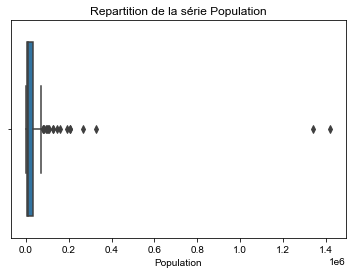

In [23]:
Boite(Filled[ColonnesRemp[1]])
Ccl1 = "Valeurs à enlever au dessus de 400000"

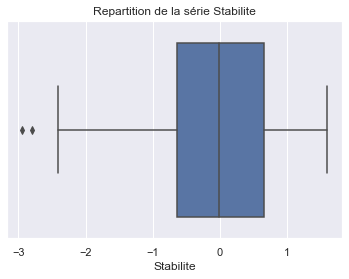

In [24]:
Boite(Filled[ColonnesRemp[2]])
Ccl2 = "RAS"

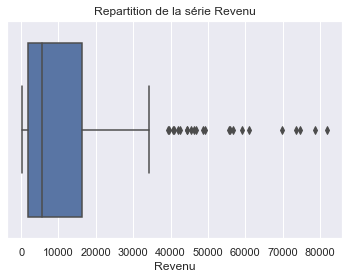

In [25]:
Boite(Filled[ColonnesRemp[3]])
Ccl3 = "RAS"

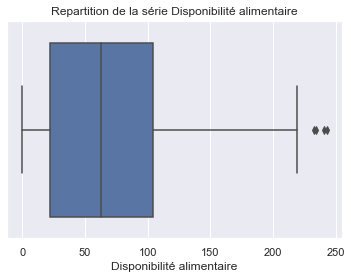

In [26]:
Boite(Filled[ColonnesRemp[4]])
Ccl4 = "RAS"

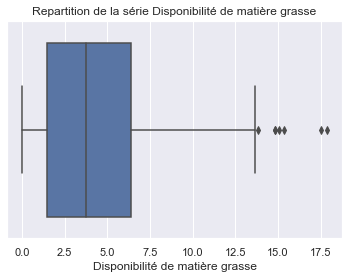

In [27]:
Boite(Filled[ColonnesRemp[5]])
Ccl5 = "RAS"

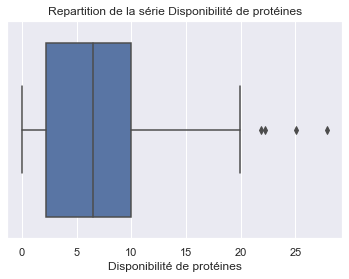

In [28]:
Boite(Filled[ColonnesRemp[6]])
Ccl6 = "RAS"

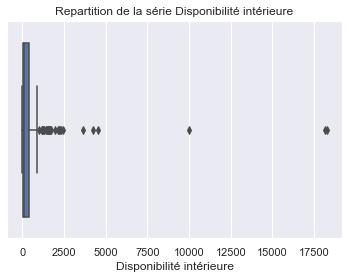

In [29]:
Boite(Filled[ColonnesRemp[7]])
Ccl7 = "Valeurs à enlever au dessus de 2500"

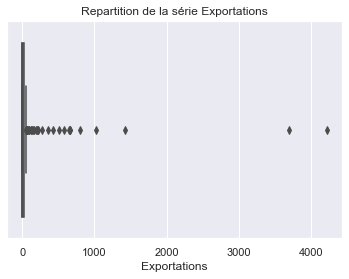

0.50625


In [30]:
Boite(Filled[ColonnesRemp[8]])
print(len(Filled.loc[Filled[ColonnesRemp[8]]<1][ColonnesRemp[8]])/len(Filled[ColonnesRemp[8]]))
Ccl8 = "Valeurs à enlever au dessus de 1500"

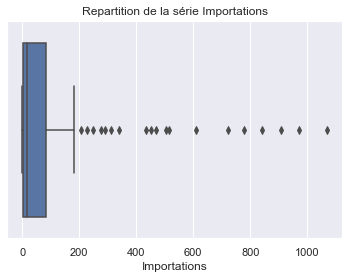

In [31]:
Boite(Filled[ColonnesRemp[9]])
Ccl9 = "RAS"

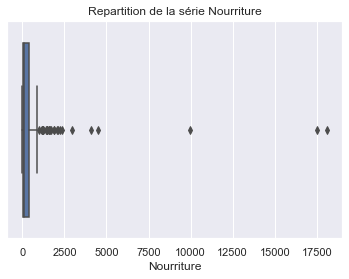

In [32]:
Boite(Filled[ColonnesRemp[10]])
Ccl10 = "Valeurs à enlever au dessus de 2500"

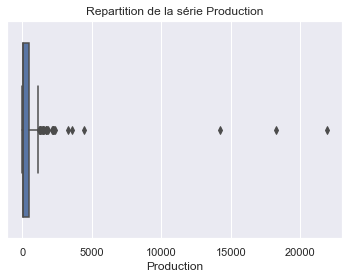

In [33]:
Boite(Filled[ColonnesRemp[11]])
Ccl11 = "Valeurs à enlever au dessus de 5000"

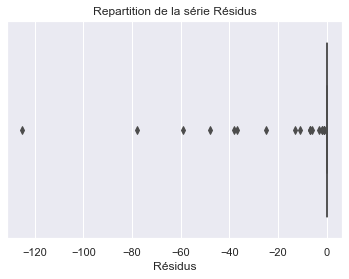

0.8875


In [34]:
Boite(Filled[ColonnesRemp[12]])
print(len(Filled.loc[Filled[ColonnesRemp[12]]>-1][ColonnesRemp[12]])/len(Filled[ColonnesRemp[12]]))
Ccl12 = "Cette variable sera retirée :89% des valeurs quasi nulles"

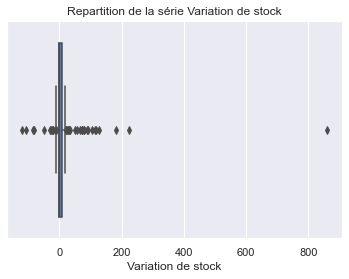

0.36875


In [35]:
Boite(Filled[ColonnesRemp[13]])
print(len(Filled.loc[(Filled[ColonnesRemp[13]]>-1) & (Filled[ColonnesRemp[13]]<1)][ColonnesRemp[13]])/len(Filled[ColonnesRemp[13]]))
#LogVarStock = np.log(Filled[ColonnesRemp[13]]-Filled[ColonnesRemp[13]].min())-(np.log(abs(Filled[ColonnesRemp[13]].min())))

Ccl13 = "Valeurs à enlever au dessus de 200"

In [36]:
ColCcl = ["Pays",Ccl1,Ccl2,Ccl3,Ccl4,Ccl5,Ccl6,Ccl7,Ccl8,Ccl9,Ccl10,Ccl11,Ccl12,Ccl13]
Conclusions = {'Colonnes': ColonnesRemp, 
               'Conclusions': ColCcl}
pd.DataFrame(data=Conclusions)

,Colonnes,Conclusions
0,Zone,Pays
1,Population,Valeurs à enlever au dessus de 400000
2,Stabilite,RAS
3,Revenu,RAS
4,Disponibilité alimentaire,RAS
5,Disponibilité de matière grasse,RAS
6,Disponibilité de protéines,RAS
7,Disponibilité intérieure,Valeurs à enlever au dessus de 2500
8,Exportations,Valeurs à enlever au dessus de 1500
9,Importations,RAS


## <a id="1C"><font size= "5" color = "#7D33AB" > 3 / Table de travail </font></a>[▲](#Sommaire)

In [37]:
Filled = Filled.drop(["Résidus"], axis=1)
Net1 = Filled.loc[Filled["Population"]<400000]
Net2 = Net1.loc[Net1["Disponibilité intérieure"]<2500]
Net3 = Net2.loc[Net2["Exportations"]<1500]
Net4 = Net3.loc[Net3["Nourriture"]<2500]
Net5 = Net4.loc[Net4["Production"]<4000]
NetF = Net5.loc[Net5["Variation de stock"]<200]

In [38]:
Table_F = NetF
DFF = Table_F.drop("Zone",axis=1)
Outliers = OutliersFill(Filled,Table_F)

# <a id="Chapitre2"><font size= "16" color = "#22AB5F" >Mission</font></a>[▲](#Sommaire)

## <a id="2A"><font size= "5" color = "#7D33AB" > 1 / ACP </font></a>[▲](#Sommaire)

#### Ebouli des valeurs propres

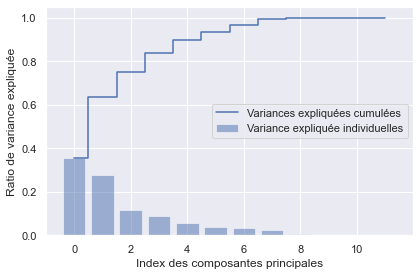

In [39]:
X_train = DFF

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, 
        align='center', label='Variance expliquée individuelles')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Variances expliquées cumulées')
plt.ylabel('Ratio de variance expliquée')
plt.xlabel('Index des composantes principales')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("Ebouli.png")
plt.show()

Choississant trois composantes pour visualiser,  le quart de l'information est perdue.

#### Cercles des corrélations

In [40]:
n_components = 3
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(DFF)
for i in range(0, n_components):
    DFF['PC' + str(i + 1)] = reduced[:, i]

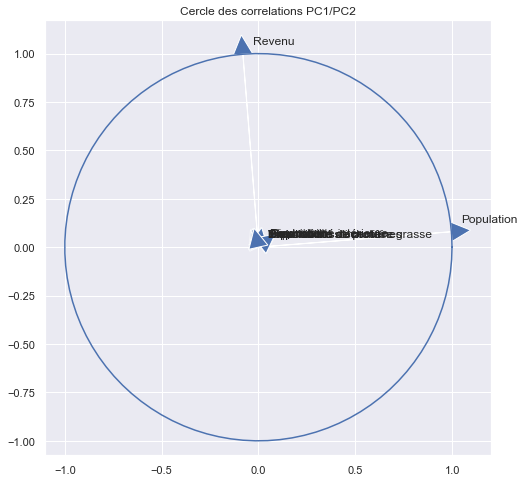

In [41]:
# Cercle de corrélation entre la première et deuxième composante.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Commence la flèche à l'origine
             pca.components_[0, i],  #0 pour composante 1 (PC1)
             pca.components_[1, i],  #1 pour composante 2 (PC2)
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             DFF.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
ax.set_title('Cercle des correlations PC1/PC2')
plt.savefig("ACPVFM1.png")
plt.show()

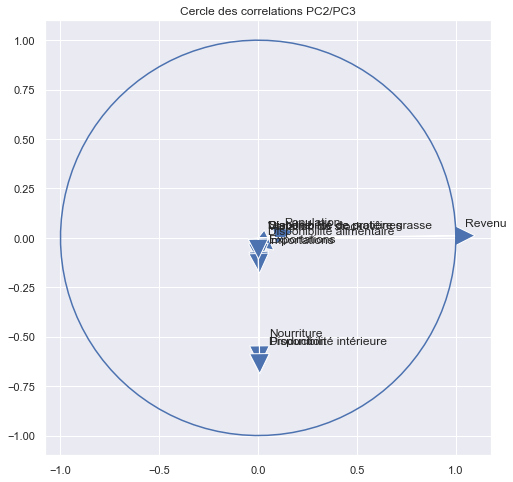

In [42]:
# Cercle de corrélation entre la première et deuxième composante.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,0,pca.components_[1, i],
             pca.components_[2, i],
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[1, i] + 0.05,
             pca.components_[2, i] + 0.05,
             DFF.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
ax.set_title('Cercle des correlations PC2/PC3')
plt.savefig("ACPVFM2.png")
plt.show()

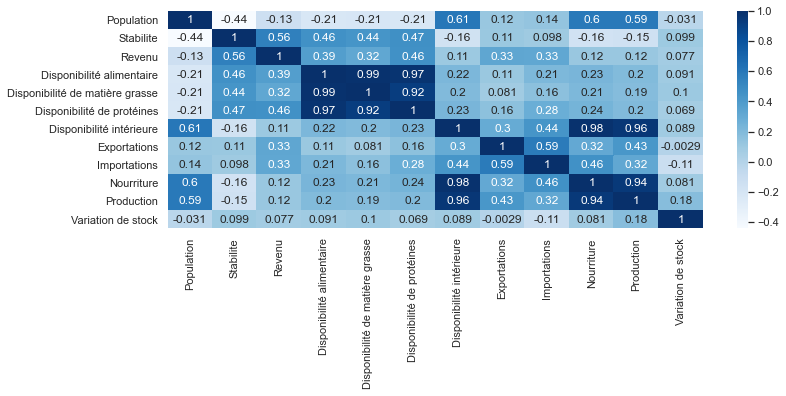

In [43]:
DFF_H = Table_F.drop("Zone",axis=1)
corr = DFF_H.corr()
sns.set(rc={'figure.figsize':(12,4)})
sns.heatmap(corr, cmap="Blues", annot=True).figure.savefig("HMACP.png")

    -Comme nous pouvons le voir dans ces graphiques, Il y a de fortes corrélations 
    entre la nourriture, disponibilité interieure, production, nous ne garderons 
    que la production

    -disponibilité alimentaire, disponibilité de matière grasse et disponibilité 
    protéines aussi et nous ne garderons que disponibilité alimentaire.

#### Table à colonnes réduite

In [44]:
SupprColonnes = ["Nourriture","Disponibilité intérieure",
                 "Disponibilité de protéines","Disponibilité de matière grasse"]

Filled_N = Filled.drop(SupprColonnes,axis=1)
Table = Table_F.drop(SupprColonnes,axis=1)
DFF2 = Table.drop("Zone",axis=1)

Ainsi cela donne 

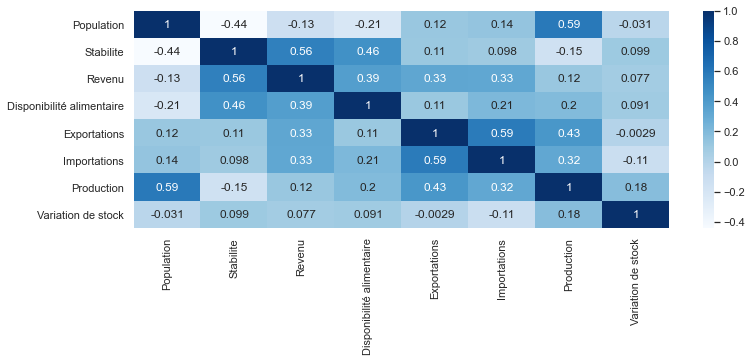

In [45]:
corr = DFF2.corr()
sns.set(rc={'figure.figsize':(12,4)})
sns.heatmap(corr, cmap="Blues", annot=True).figure.savefig("HMACP2.png")

## <a id="2B"><font size= "5" color = "#7D33AB" > 2 / Clustering </font></a>[▲](#Sommaire)

#### Méthode de la classification ascendante hiérarchique

In [51]:
# générer la matrice des liens
DFF3 = pd.DataFrame(normalize(DFF2))
Z = linkage(DFF3, method='ward',metric='euclidean')
DFF3.shape

(152, 8)

#### Visualisation par dendogramme

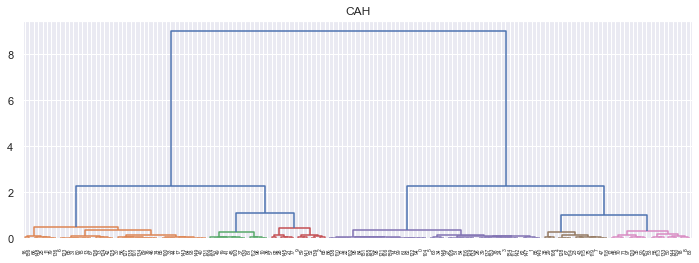

In [52]:
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=Table.index,orientation='top',color_threshold=1)
plt.show()

#### Clustering Kmeans

Score de silouhette

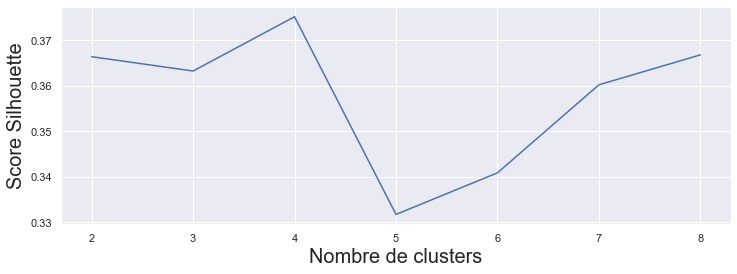

In [53]:
Silhouette(DFF3)

La comparaison des scores de silhouette montre qu'il est préférable d'utiliser trois clusters

kmeans

In [54]:
# Nombre de cluster 3.
# Random state est présent pour la présentation, en effet
# même si la représentation final revient souvent lors
# des restart de Kernel, il arrive que cela change
# par la structure même de kmeans. Random_state permet
# de retomber à chaque fois sur le clustering utilisé
# pour la présentation finale.
kmeans = cluster.KMeans(n_clusters=4, random_state = 42)
kmeans.fit(DFF3)
idk = np.argsort(kmeans.labels_)

## <a id="2C"><font size= "5" color = "#7D33AB" > 3 / Table des groupes et Heatmap </font></a>[▲](#Sommaire)

#### Récuperation des outliers

In [56]:
DataF = Filled_N

OutGroupe=pd.DataFrame({'Zone': [], 'Groupe': []})

for i in Outliers["Zone"]:
    a = kmeans.predict(pd.DataFrame(normalize(DataF.loc[DataF["Zone"]==i].drop("Zone",axis=1))))
    dfOut = pd.DataFrame({'Zone': [i],'Groupe': a})
    OutGroupe = pd.concat([OutGroupe, dfOut], sort=False)

OutGroupe.assign(Grp =OutGroupe["Groupe"].astype(int))[["Zone","Grp"]].rename(columns={"Grp": "Groupe"})
OutGroupe

,Zone,Groupe
0,Inde,0.0
0,Pologne,2.0
0,Brésil,0.0
0,Japon,2.0
0,États-Unis d'Amérique,0.0
0,"Chine, continentale",0.0
0,Fédération de Russie,0.0
0,Mexique,0.0


#### Table des groupes

In [57]:
# Les zones et leur index
Pays = Filled_N.reset_index()[["index","Zone"]]

In [58]:
# Clusters
Cluster = pd.DataFrame(Table.index[idk],kmeans.labels_[idk]).reset_index()[[0,"index"]]
# Changement de nom pour la jointure
ClusterM = Cluster.rename(columns={"index": "Groupe",0: "index"})
# Jointure entre les groupes et les zones
Groupement1 = ClusterM.merge(Pays, on="index").merge(Table, on="Zone")

In [59]:
# Jointures entre les groupes et les zones mises de côté
OutConcat = OutGroupe.merge(Filled_N.reset_index(), on="Zone")
OutConcat

,Zone,Groupe,index,Population,Stabilite,Revenu,Disponibilité alimentaire,Exportations,Importations,Production,Variation de stock
0,Inde,0.0,60,1338676.785,-0.76,1940.138221,7.0,4.0,0.0,3545.0,-119.0
1,Pologne,2.0,111,37953.180,0.52,13294.829441,107.0,1025.0,55.0,2351.0,225.0
2,Brésil,0.0,20,207833.823,-0.42,9739.802249,204.0,4223.0,3.0,14201.0,0.0
3,Japon,2.0,69,127502.725,1.11,39531.297350,67.0,10.0,1069.0,2215.0,859.0
4,États-Unis d'Amérique,0.0,158,325084.756,0.34,61073.943857,219.0,3692.0,123.0,21914.0,80.0
5,"Chine, continentale",0.0,32,1421021.791,-0.23,8889.942544,59.0,576.0,452.0,18236.0,-50.0
6,Fédération de Russie,0.0,48,145530.082,-0.64,10551.455340,104.0,115.0,226.0,4444.0,-1.0
7,Mexique,0.0,91,124777.324,-0.72,9046.692344,123.0,9.0,972.0,3249.0,-6.0


In [60]:
# Rassemblement des deux dernières tables
Groupement = pd.concat([Groupement1, OutConcat], sort=False)
GroupHM = Groupement.drop("Zone", axis=1)
Groupement

,index,Groupe,Zone,Population,Stabilite,Revenu,Disponibilité alimentaire,Exportations,Importations,Production,Variation de stock
0,0,0.0,Afghanistan,36296.113,-2.80,519.395889,5.0,0.0,29.0,28.0,0.0
1,104,0.0,Ouganda,41166.588,-0.57,643.170223,5.0,0.0,0.0,65.0,0.0
2,102,0.0,Népal,27632.681,-0.69,936.821624,7.0,0.0,0.0,58.0,0.0
3,99,0.0,Nigéria,190873.244,-2.00,1806.283177,2.0,0.0,0.0,201.0,0.0
4,98,0.0,Niger,21602.382,-1.27,508.667034,3.0,0.0,3.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3,69,2.0,Japon,127502.725,1.11,39531.297350,67.0,10.0,1069.0,2215.0,859.0
4,158,0.0,États-Unis d'Amérique,325084.756,0.34,61073.943857,219.0,3692.0,123.0,21914.0,80.0
5,32,0.0,"Chine, continentale",1421021.791,-0.23,8889.942544,59.0,576.0,452.0,18236.0,-50.0
6,48,0.0,Fédération de Russie,145530.082,-0.64,10551.455340,104.0,115.0,226.0,4444.0,-1.0


#### Heatmap

In [61]:
GrpPrep = GroupHM.drop("index", axis=1).drop("Groupe", axis=1)
NormGr = normalized(GrpPrep).reset_index().merge(GroupHM[["index","Groupe"]],
                                                 on="index").drop("index", axis=1)
NormGr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Population                 160 non-null    float64
 1   Stabilite                  160 non-null    float64
 2   Revenu                     160 non-null    float64
 3   Disponibilité alimentaire  160 non-null    float64
 4   Exportations               160 non-null    float64
 5   Importations               160 non-null    float64
 6   Production                 160 non-null    float64
 7   Variation de stock         160 non-null    float64
 8   Groupe                     160 non-null    float64
dtypes: float64(9)
memory usage: 12.5 KB


In [62]:
# Moyenne des données par groupes pour chaque colonnes
GrpG = NormGr.groupby(by="Groupe").mean().reset_index().drop("Groupe", axis=1)
GrpG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Population                 4 non-null      float64
 1   Stabilite                  4 non-null      float64
 2   Revenu                     4 non-null      float64
 3   Disponibilité alimentaire  4 non-null      float64
 4   Exportations               4 non-null      float64
 5   Importations               4 non-null      float64
 6   Production                 4 non-null      float64
 7   Variation de stock         4 non-null      float64
dtypes: float64(8)
memory usage: 384.0 bytes


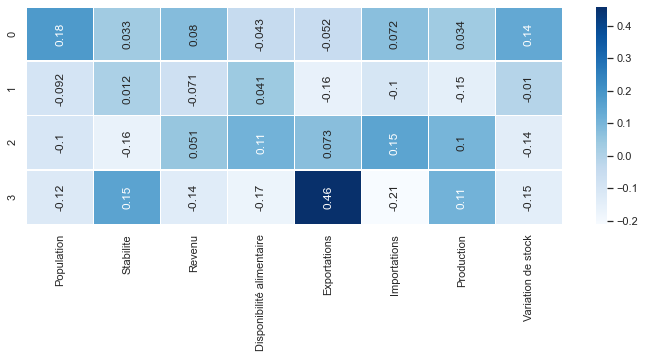

In [63]:
# Heatmap finale
sns.set(rc={'figure.figsize':(12,4)})
sns.heatmap(GrpG, cmap="Blues", linewidths=.5, annot=True,annot_kws={'rotation': 90}).figure.savefig("Heatmap.png")

    - Le groupe 0 A un taux relativement faible et moyen dans tout les domaines.
    - Le groupe 1 a un fort taux dans la stabilité politique et les revenu, ainsi qu'un taux faible pour l'exportation, l'importation et l'exportation.
    - Le groupe 2 a une population forte avec une stabilité politique moindre, de plus la production est très forte.

Il m'apparaît que le meilleurs groupe est le 1, pour sa bonne stabilité politique, son fort revenu et son manque de production.

#### Export

In [ ]:
Groupement.to_csv(r'C:\Users\lucbo\OneDrive\Bureau\PaysGroupeFin.csv', sep=",")